# Task 1. Regression
a)Learn a function via regression that can determine 

(i) the attribute SD Pan using the other numeric
attributes. Use the training data to do this. (2 points)

In [3]:
# note: the zip file is not uploaded
import pandas as pd

training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv')
testing.head()


,class,GLCM_pan,Mean_Green,Mean_Red,Mean_NIR,SD_pan
0,n,109.828571,183.700000,82.950000,251.750000,16.079412
1,n,130.284483,212.637931,96.896552,482.396552,21.210295
2,n,131.386555,185.466667,85.466667,419.666667,13.339998
3,n,141.345098,180.875000,81.500000,348.062500,18.213577
4,w,121.383408,218.357143,112.017857,426.607143,19.083196


In [17]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(fit_intercept=True)
lr.fit(training[training.columns[1:5]], training["SD_pan"].values)
training.columns[1:5]


LinearRegression()

In [19]:
lr.score(training[training.columns[1:5]], training["SD_pan"].values)


0.0752620333024483

This is bad. The $R^2$ is near to 0.

b)  Learn a function that predicts the attribute Mean Red based on the attribute Mean Green. Create a
scatterplot that maps Mean Green to Mean Red and add the regression function (line plot) to it. (3
points)

In [62]:
lr2 = LinearRegression(fit_intercept=True)
lr2.fit(training["Mean_Green"].to_numpy().reshape(-1,1), training["Mean_Red"])
lr2.score(training["Mean_Green"].to_numpy().reshape(-1,1), training["Mean_Red"])


0.9306107332447658

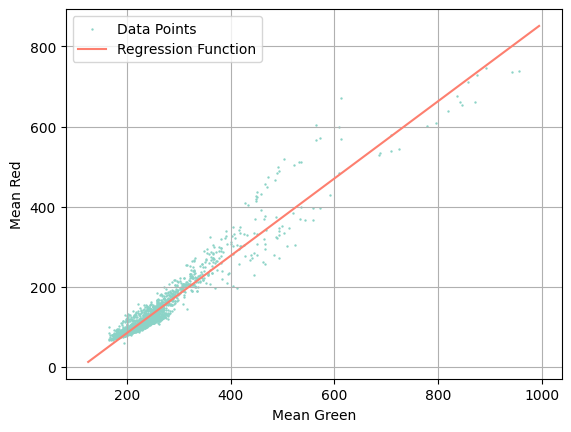

In [63]:
import matplotlib.pyplot as plt
import numpy as np
# General settings of the plot
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel("Mean Green")
ax.set_ylabel("Mean Red")
# Scatter plot between mean green and mean red
ax.scatter(training["Mean_Green"], training["Mean_Red"], s=0.5,\
     label = "Data Points", c = "#8bd3c7")

# line plot showing the result of regression
X = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1])
Y = lr2.coef_*X + lr2.intercept_
ax.plot(X, Y, label = "Regression Function", c = "#fd7f6f")
ax.legend()
ax.plot()
fig.show()


# Task 2. Logistic Regression
a) Calculate and plot a logistic regression for the data set. (3 points)

In [65]:
df = pd.read_csv("examresults.csv", sep=";")
df.head()


,time_invest,passed
0,24,1
1,23,1
2,30,1
3,22,0
4,13,0


In [70]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(df.time_invest.to_numpy().reshape(-1, 1), df.passed)


LogisticRegression()

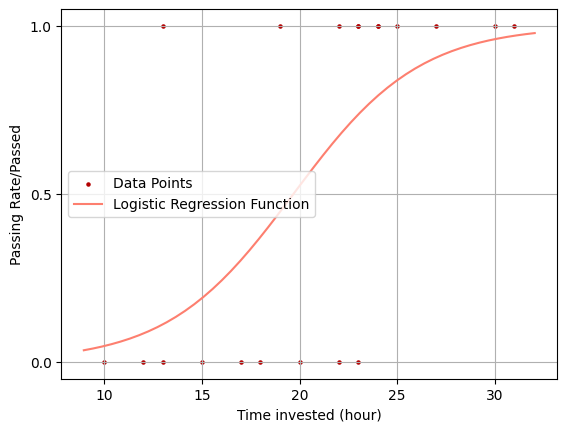

In [93]:
# General settings of the plot
fig, ax = plt.subplots()
ax.grid()
ax.set_xlabel("Time invested (hour)")
ax.set_ylabel("Passing Rate/Passed")
ax.set_yticks((0, 0.5, 1))

# Scatter plot between mean green and mean red
ax.scatter(df.time_invest, df.passed, s=5,\
     label = "Data Points", c = "#b30000")

# line plot showing the result of regression
X = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1])
Y = lor.predict_proba(X.reshape(-1,1))[:, 1]
ax.plot(X, Y, label = "Logistic Regression Function", c = "#fd7f6f")
ax.legend(loc="center left")
ax.plot()
fig.show()


b) Based on the estimated values, calculate (by hand) the chance of passing an exam if

(i) one hour of work is invested and 

(ii) 10 more working hours are invested. (2 points)

In [96]:
print(lor.intercept_, lor.coef_)


[-6.09681964] [[0.30962979]]


In [100]:
lor.predict_proba([[1], [10] , [11]])


array([[0.99694279, 0.00305721],
       [0.95259769, 0.04740231],
       [0.93648706, 0.06351294]])